**Replace with your name and a brief description of the notebook.**

# Homework 22

We will use the New York State labor market data set from Homework 21.  

Data URL:  [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs

%matplotlib inline
pd.set_option("display.max_columns", None)

### Question 1: Load, clean and scale the data 

This question combines Question 1 of Homework 21 with scaling the data (Questions 4a of Homework 21).

a) This data file requires some cleaning. Open the CSV file in Jupyter or another text editor to see what the possible problems are, and refer to Lab 4 for how to fix them.

In [4]:
labor = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/labor-market-Feb2021.csv", skiprows=13)

In [6]:
# Drop all NA values
labor = labor.dropna(how = "any")
# Remove commas from two columns and cast them to integers
labor['Median Wage Early Career'].replace(',','', regex=True, inplace=True)
labor['Median Wage Mid-Career'].replace(',','', regex=True, inplace=True)
labor['Median Wage Early Career'] = labor['Median Wage Early Career'].astype(float)
labor['Median Wage Mid-Career'] = labor['Median Wage Mid-Career'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/var/folders/kh/mc7wqk790gq74xwfqmhncx080000gn/T/ipykernel_3731/3751422393.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor['Median Wage Early Career'] = labor['Median Wage Early Career'].astype(float)
/var/folders/kh/mc7wqk790gq74xwfqmhncx080000gn/T/ipykernel_3731/3751422393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [8]:
labor.head()

,Major,Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree
0,Agriculture,3.0,60.3,40000.0,65000.0,20.8
1,Animal and Plant Sciences,2.6,58.6,37000.0,63000.0,35.1
2,Environmental Studies,3.9,53.7,39000.0,65000.0,30.5
3,Architecture,2.2,27.9,50000.0,76000.0,41.0
4,Ethnic Studies,5.1,51.9,40000.0,67000.0,48.6


1b) Create a new DataFrame with the 5 quantitative columns (Unemployment Rate,Underemployment Rate,Median Wage Early Career,Median Wage Mid-Career,Share with Graduate Degree) scaled to be between 0 and 1.

In [9]:
x = labor[['Unemployment Rate', 'Underemployment Rate', 'Median Wage Early Career', 'Median Wage Mid-Career', 'Share with Graduate Degree']]

In [10]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Question 2:  Elbow method

2a) Write a loop that uses the k-means algorithm to cluster the scaled labor data for each k from 1 to 10, and store the inertia for each cluster in a list.

In [11]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    inertia_list.append(kmeans.inertia_)

2b) Plot a line plot of the inertias for each k.

Text(0, 0.5, 'Inertia')

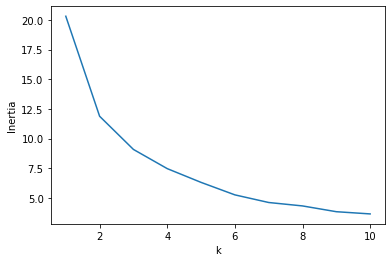

In [13]:
plt.plot(range(1,11), inertia_list)
plt.xlabel("k")
plt.ylabel("Inertia")

2c) Based on your plot from 2b, what how many clusters do you think this data contains?

**2c answer:** I believe that this data contains 4 clusters.

### Question 3: Elbow method continued

a) Re-run k-means with the k you chose in Question 2c.  

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_scaled)
clusters = kmeans.predict(x_scaled)

3b) Plot the scatterplots of all pairs of quantitative variables in the original labor DataFrame colored by the clusters found in 3a.

In [15]:
labor['clusters'] = clusters

/var/folders/kh/mc7wqk790gq74xwfqmhncx080000gn/T/ipykernel_3731/569799995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor['clusters'] = clusters


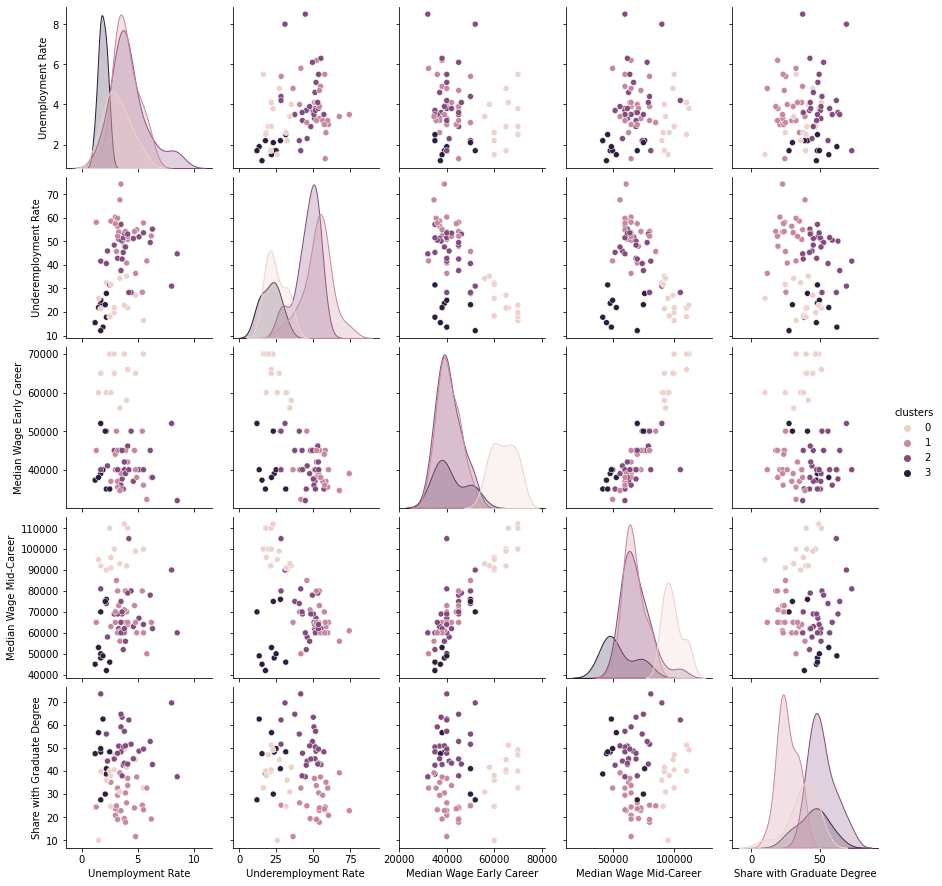

In [16]:
sns.pairplot(labor, hue="clusters")

3c) Based on your plots visualization from 3b, how good do you think this clustering is?  Are there any problems?

**3c answer:**  I think that for the most part this clustering worked well. The only thing that I would flag is the rather mixed nature of some of the pairings. This could be due to overlap, however.

### Question 4: Silhouette Method

a) Write a loop that uses the k-means algorithm to cluster the scaled labor data for each k from 2 to 10, and store the silhouette score for each cluster in a list.

In [17]:
silhouette_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    clusters = kmeans.predict(x_scaled)
    score = silhouette_score(x_scaled,clusters)
    silhouette_list.append(score)

4b) Plot a line plot of the silhouette scores for each k.

Text(0, 0.5, 'Silhouette Score')

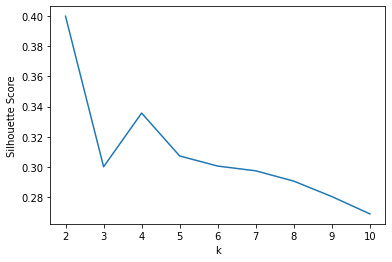

In [18]:
plt.plot(range(2,11), silhouette_list)
plt.xlabel("k")
plt.ylabel("Silhouette Score")

4c) Based on your plot from 4b, what how many clusters do you think this data contains?

**4c answer:** There should be 2 clusters according to this score

### Question 5:  Silhouette Method continued

a) Re-run k-means with the k you chose in Question 4c.

In [19]:
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(x_scaled)
clusters2 = kmeans2.predict(x_scaled)

5b) Plot the scatterplots of all pairs of quantitative variables in the original labor DataFrame colored by the clusters computed in 5a.

In [20]:
labor['clusters2'] = clusters2

/var/folders/kh/mc7wqk790gq74xwfqmhncx080000gn/T/ipykernel_3731/1990150025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor['clusters2'] = clusters2


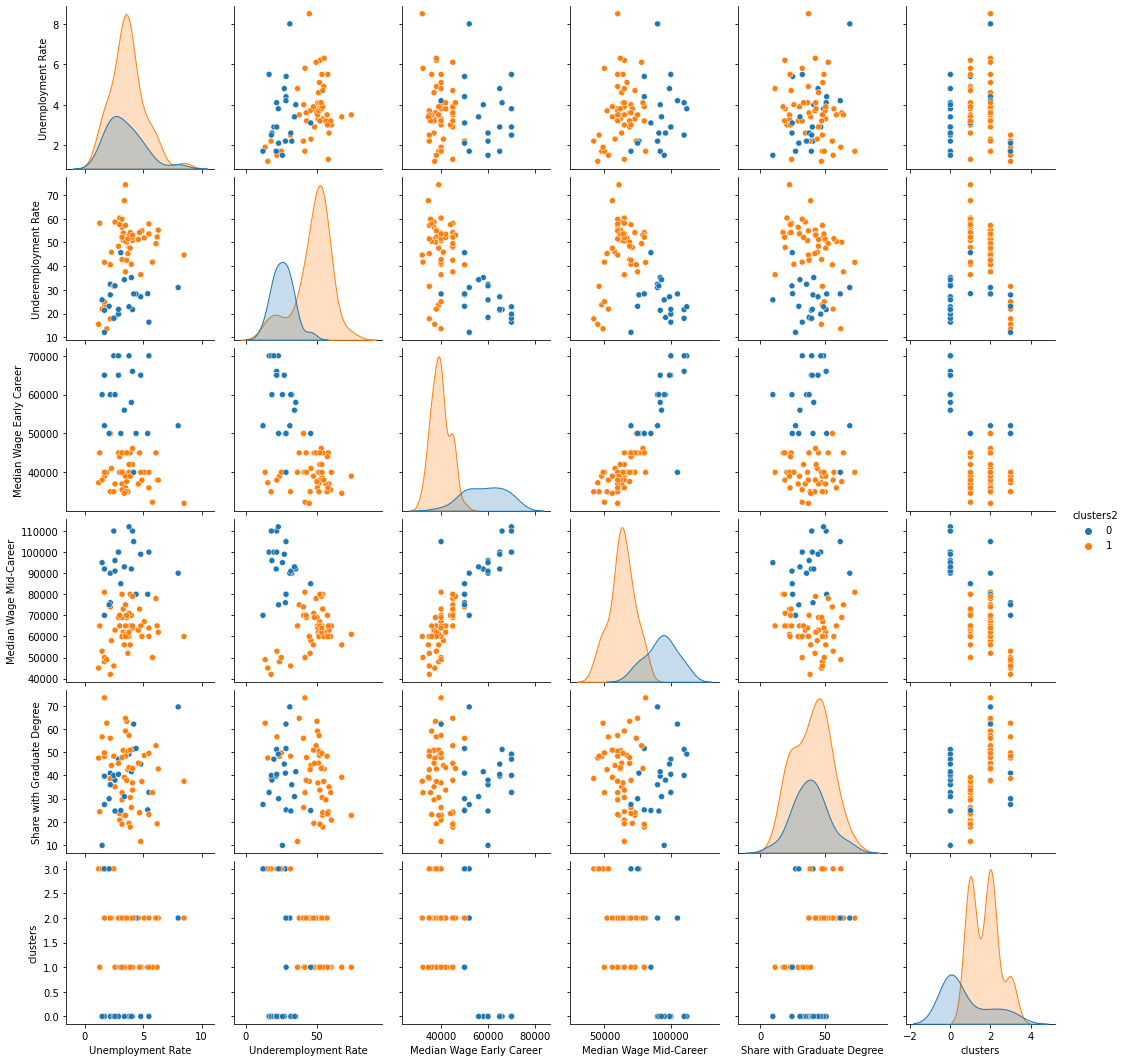

In [21]:
sns.pairplot(labor, hue="clusters2")

5c) Based on visualization from 5b, how good do you think this clustering is? Are there any problems?

**5c answer:** I think that this clustering method did a better job at classifying the majors. The only issue I have with these results is that I do not believe they capture the full scope of the data due to the fact that there are so many different majors and wages represented.